## Analyze A/B Test Results


## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [77]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline


#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

df = pd.read_csv('/Users/Mohmad_Foad/Desktop/DAND/data/ab_data.csv')

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [78]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


b. Use the cell below to find the number of rows in the dataset.

In [79]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [80]:
df.nunique()

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

d. The proportion of users converted.

In [81]:
df.query("converted == 1").count() / df.shape[0]

user_id         0.119659
timestamp       0.119659
group           0.119659
landing_page    0.119659
converted       0.119659
dtype: float64

e. The number of times the `new_page` and `treatment` don't match.

In [82]:
New_page_control = df.query("landing_page == 'new_page' and group == 'control'").count()[0]
New_page_control 

old_page_treatment = df.query("landing_page == 'old_page' and group == 'treatment'").count()[0]
old_page_treatment

print('The total unmatch rows for new page and treament group is  '+ str(New_page_control + old_page_treatment))

The total unmatch rows for new page and treament group is  3893


f. Do any of the rows have missing values?

In [83]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [84]:
df2 = df.copy()
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [85]:
old_page = df['landing_page'] == 'old_page'
new_page = df['landing_page'] == 'new_page'
control = df['group'] == 'control'
treament = df['group'] == 'treatment'
df_cond = (df[(treament) & (old_page)] + df[(control) & (new_page)]).index
df2 = df.drop(df_cond)

In [86]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [87]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [88]:
df2[df2.duplicated(['user_id'], keep=False)]

# duoble check the user
df2.query("user_id == 773192")

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [89]:
df2.query("user_id == 773192")

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [90]:
df2.drop(1899, inplace = True)

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [91]:
x = df2.query("converted == 1").count()[0] / df2.shape[0]
round(x,4)

0.1196

b. Given that an individual was in the `control` group, what is the probability they converted?

In [92]:
x  = df2.query("converted == 1 and group == 'control'").count()[0] /df2.query("group == 'control'").count()[0]
round(x,4)

0.1204

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [93]:
x = df2.query("converted == 1 and group == 'treatment'").count()[0] / df2.query("group == 'treatment'").count()[0]
round(x,4)

0.1188

d. What is the probability that an individual received the new page?

In [94]:
df2.query("landing_page == 'new_page'").count()[0] / df2.shape[0]

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**Answer**

- The probability of converted over all is 0.1196. Maybe, the evidence show that half of the individaul land on the new page but only 0.1204 from the control group, which is not sufficient.

<a id='ab_test'></a>
### Part II - A/B Test
 
`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**

H0 = **$P_{old}$** > **$P_{new}$**
- The Null Hypothes is that new page is not better or event worse than the old page

H1 = **$P_{New}$** > **$P_{Old}$**
- The Alternative Hypothese is that new page is better.

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [95]:
p_new = df2.query("converted == 1")['user_id'].nunique() / df2['user_id'].nunique()
p_new

# simple Verions 
p_new = df2['converted'].mean()
round(p_new,4)

0.1196

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [96]:
p_old = df2.query("converted == 1")['user_id'].nunique() / df2['user_id'].nunique()
p_old

# simple Verison
p_old = df2['converted'].mean()
round(p_old,4)

0.1196

c. What is $n_{new}$, the number of individuals in the treatment group?

In [97]:
# n_new is the number of people that received the new page

n_new = df2[df2['landing_page'] == 'new_page'].count()[0]
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [98]:
# n_old is the number of people that received the old page

n_old = df2.query("landing_page == 'old_page'").count()[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [99]:
new_page_converted = np.random.binomial(1,p_new, n_new)

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [100]:
old_page_converted = np.random.binomial(1,p_old, n_old)

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [101]:
obs_diff = (new_page_converted).mean() - (old_page_converted).mean()
obs_diff

0.0007481397374574372

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [102]:
new_converted_simulation = np.random.binomial(n_new, p_new, 10000)/n_new
old_converted_simulation = np.random.binomial(n_old, p_old, 10000)/n_old
p_diffs = new_converted_simulation - old_converted_simulation
p_diffs

array([ 0.00066554,  0.00039025,  0.00018382, ..., -0.00082084,
       -0.00056658,  0.00012174])

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

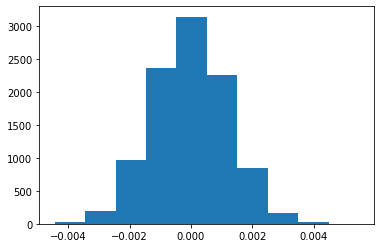

In [103]:
plt.hist(p_diffs);

#plt.axvline(x=p_diffs, c = 'red')

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [104]:
obs_diff = df2.query('group == "treatment"')['converted'].mean()-df2.query('group == "control"')['converted'].mean()
obs_diff 
(p_diffs > obs_diff).mean()

0.9009

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Answer**

- The p-value is the proporation of the P_diffs that are greater than the actual difference which observed in the main datat set.

- p-value is the proability of observing your statistic if the null hypothesis is true. Furthermore, The alternative's difference is great than 0 but the null is equal or less than 0.

- The null hypothesis can be rejected  When the difference is less than 0 and p-value is large because of the missing evidence.

- The average of converted to the new page is lower than the old page.

- H1 u < 0

- Last, it was the p-value bceause the 1 - 0.9066 will give the on Tailed.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [105]:
import statsmodels.api as sm

# correct
convert_old = df2.query("converted == 1 and landing_page == 'old_page'").count()[0] 
convert_new = df2.query("converted == 1 and landing_page == 'new_page'").count()[0] 
n_old = df2.query("landing_page == 'old_page'").count()[0]
n_new = df2.query("landing_page == 'new_page'").count()[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [106]:
from scipy.stats import norm
critical_value = norm.ppf(1 - (0.05 / 2))
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], value = None, alternative='smaller')

print("z_score = {}, p_value = {} and critical_value = {}".format(
                                                                round(z_score,2),
                                                                round(p_value,2),
                                                                round(critical_value,2)
                                                                ))

z_score = 1.31, p_value = 0.91 and critical_value = 1.96


In [107]:
from scipy.stats import norm
critical_value = norm.ppf(1-(0.05/2))
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger')
print ("z_score = {}, p_value = {} and critical_value = {} ".format(round(z_score,2),round(p_value,2),round(critical_value,2)))

z_score = -1.31, p_value = 0.91 and critical_value = 1.96 


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

#### **Answer.**

- The z-score is - - 1.31 that there is not a lot people converted to the new page. On other words, we failed to reject the null hypothesis.


- The p-value is 0.91 that is stistically signigicant for Null hypothesis, which leads to reject the alternative.

- The critical_value is 1.96, which higher than the z-score. Thus, we failed to reject the null hypothesis


- Refernce 

"A p-value higher than 0.05 (> 0.05) is not statistically significant and indicates strong evidence for the null hypothesis. This means we retain the null hypothesis and reject the alternative hypothesis. You should note that you cannot accept the null hypothesis, we can only reject the null or fail to reject it."
Source: https://www.simplypsychology.org/p-value.html

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Answer**

- Logistic Regression because the group column is categorical variable

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [108]:
df2['intercept'] = 1

df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']

df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [109]:
gm = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])

result = gm.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [110]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Fri, 10 Apr 2020   Pseudo R-squ.:               8.077e-06
Time:                        22:29:28   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>
**Answer**

- One-Tailed Test:

`-` The test allow to decide if the one of the greater / less than other mean; however, the test can not be both. In sample way, the one tail test tell the impact of the change in one direction only. For example. the test will tell us only if the new page is better than old page without insight details. The one tail test should be use to affect the for direction in case when no infomation about the direction. In addition, the test is faster because it requiest less traffic, however, it can lead to inaccurate and the result may biased.

- Two-Tailed Tes:

`-` The test help us to find the different between the two means with no prior tesing for the direction. Postive and negative result are considered when taking the two-tailed tests. On opposite to the one-tailed, the two-tailed tell us if the new page is equal or worse than the old page. The test is accurate and reliable, but will take some time process the test.

- P-value in part II is 0.91, which one-tailed test, but in part III the value is 0.000 for the intercept.
 
- In adition,
    
`1` h0 mean < converted Rate

`2` h1 mean > converted Rate


- Source:

https://www.youtube.com/watch?v=XHPIEp-3yC0

https://blogs.oracle.com/marketingcloud/the-difference-between-one-tailed-two-tailed-testing


f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?<br/><br/>
**Answer.**

- When adding another factor, it helps reduced confusion and to know which categorical variable has most impact.

- One of the disavantages to adding additional terms is the increase the variance of the estimate of corrrelation cofficient of the others variables, which not benefit the model overall. On other words, the additional terms may lead to reduces the observation bewteen the independent variables and the depenpend. 

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns. Provide the statistical output as well as a written response to answer this question.

In [111]:
country_df = pd.read_csv('/Users/Mohmad_Foad/Desktop/DAND/data/countries.csv')
country_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [112]:
# make the joion
df2 = pd.merge(df2, country_df, on = 'user_id')
df2.head(3)

df2['country'].value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [113]:
# dummies variables for countries
df2[['CA', 'UK', 'US']] = pd.get_dummies(df2['country'])
df2['intercept2'] = 1

df2.head(3)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US,intercept2
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1,1


In [114]:
# following the fourth point from the reviewer the average as added to check
# the cell comes next where the model and country was added  
print('The average mean for USA is '+ str(df2['US'].mean()))
print('The average mean for UK is ' + str(df2['UK'].mean()))
print('The average mean for CA is ' + str(df2['CA'].mean()))
print(df2.groupby('ab_page').mean()['converted'])

The average mean for USA is 0.7007233708669438
The average mean for UK is 0.24938055777331167
The average mean for CA is 0.04989607135974451
ab_page
0    0.120386
1    0.118808
Name: converted, dtype: float64


In [115]:
# following the last tip from reviewer 
# the countries were added, and one of them was drop, which USA

gm = sm.Logit(df2['converted'], df2[['intercept2', 'CA', 'UK']])

result2 = gm.fit()

result2.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Fri, 10 Apr 2020   Pseudo R-squ.:               1.521e-05
Time:                        22:29:29   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept2    -1.9967      0.007   -292.314      0.000      -2.010      -1.983
CA            -0.0408      0.027     -1.518      0.129      -0.093       0.012
UK             0.0099      0.013      0.746      0.456      -0.016       0.036
==============================================================================
"""

- Summary for the model

`1` the intercept 2 hsa p-vale Zeor, which is statistically significant.

`2` CA has the least impac on the model but the UK came second.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [116]:
df_new = df2.copy()
df_new

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US,intercept2
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
290579,751197,2017-01-03 22:28:38.630509,control,old_page,0,1,0,US,0,0,1,1
290580,945152,2017-01-12 00:51:57.078372,control,old_page,0,1,0,US,0,0,1,1
290581,734608,2017-01-22 11:45:03.439544,control,old_page,0,1,0,US,0,0,1,1
290582,697314,2017-01-15 01:20:28.957438,control,old_page,0,1,0,US,0,0,1,1


In [117]:

df_new['US_ab_page'] = df_new['US'] * df_new['ab_page']
df_new['UK_ab_page'] = df_new['UK'] * df_new['ab_page']
df_new['CA_ab_page'] = df_new['CA'] * df_new['ab_page']

df_new.head(4)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US,intercept2,US_ab_page,UK_ab_page,CA_ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1,1,0,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1,1,0,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1,1,1,0,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1,1,1,0,0


In [118]:
# following the fourth point from the reviewer the average as added to check

gm = sm.Logit(df_new['converted'], df_new[['intercept','US_ab_page', 'UK_ab_page']])
 
result3 = gm.fit()
 
result3.summary()

Optimization terminated successfully.
         Current function value: 0.366117
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Fri, 10 Apr 2020   Pseudo R-squ.:               1.082e-05
Time:                        22:29:30   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.3164
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9926      0.008   -252.910      0.000      -2.008      -1.977
US_ab_page    -0.0144      0.012     -1.155      0.248      -0.039       0.010
UK_ab_page     0.0112      0.018      0.626      0.532      -0.024       0.046
==============================================================================
"""

#### Summary 

- The only statisticailly signigicant is the US becuase p-value is Zero compare to the others countries.

- UK has highest convertes rate. Then CA is second based on the Coef Rate

- The p-value for the intercept was Zero

- The intercation between the countries and page was significant. For instance, the p-vale US-ab Pgae is 0.248

- Last, the the acceopt the null hypothesis.

- To summarize, the company should not procedure because the new page wil not increase the convertd rate comparing to the cost of building the new pages.

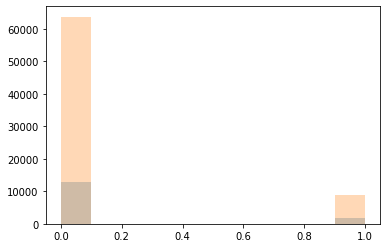

In [119]:
plt.hist(df2.query("CA == 1")['converted'], alpha = 0.3, label = 'CA');
plt.hist(df2.query("UK == 1")['converted'], alpha = 0.3, label = 'UK');

<a id='conclusions'></a>
## Finishing Up

In [120]:
#from subprocess import call
#call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebookFinal.ipynb'])